In [15]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
import cmocean as cmocean

Populating the interactive namespace from numpy and matplotlib


In [16]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
#print geolon_t.shape

fh=fcor/ht
#print fh.shape

vgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

mom025_yu_ocean=yu_ocean
mom025_potrho=potrho

In [17]:
nc = Dataset('/g/data/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra111to120.nc', mode='r') # file handle, open in read only mode
dzt = nc.variables['dzt'][0,:,:,:]
nc.close() # close the file

In [11]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

In [ ]:
Ocean_File = os.path.join(NYFPertDir,'output*/ocean_bgc_carbon*.nc')
np_pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(np_pert.o2.shape)

Ocean_File = os.path.join(NYFCntrlDir,'Tdim_output197*/ocean_bgc_carbon*.nc')
print(Ocean_File)
np_cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(np_cntrl.o2.shape)

Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean_bgc_carbon*.nc')
np_cntrl2=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(np_cntrl2.o2.shape)


In [ ]:
st=30
print(st_ocean[st])

var5=np_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[0*12:10*12,st,0:500,:].mean('Time').load()
var4=np_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[10*12:20*12,st,0:500,:].mean('Time').load()
#a=(pOz-cOz[0:pOz.shape[0],:])/cOz[0:pOz.shape[0],:]*100
#a=(var2-var1[0:var2.shape[0],:])/var1[0:var2.shape[0],:]*100


In [4]:
var3=np_cntrl2.o2[10*12:20*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[0*12:10*12,st,0:500,:].mean('Time').load()

NameError: name 'np_cntrl2' is not defined

In [5]:
var1=np_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()
var2=np_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()


NameError: name 'np_pert' is not defined

In [21]:
a=(var2-var1[0:var2.shape[0],:])/var1[0:var2.shape[0],:]*100
print(np.max(var1))
print(a.shape)

<xarray.DataArray 'o2' ()>
array(258.71213, dtype=float32)
Coordinates:
    st_ocean  float64 1.498e+03
(500, 1440)


1497.5618896484375


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


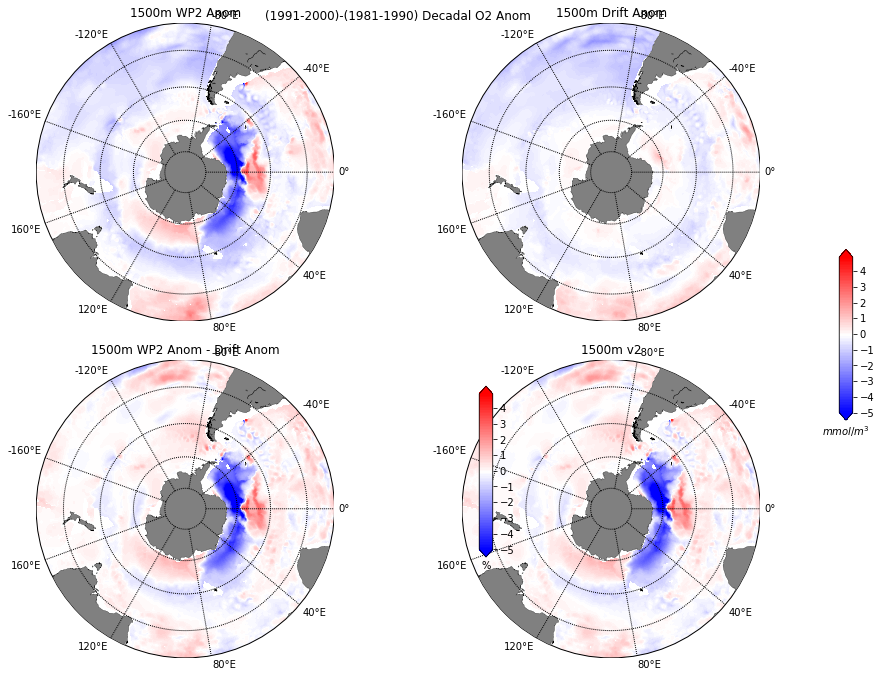

In [12]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal O2 Anom')

clev = np.arange(-5,5.1,.1)
#print clev

st=30
print(st_ocean[st])

#var1=np_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[0*12:10*12,st,0:500,:].mean('Time').load()
#var2=np_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[10*12:20*12,st,0:500,:].mean('Time').load()
#a=(pOz-cOz[0:pOz.shape[0],:])/cOz[0:pOz.shape[0],:]*100

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1500m WP2 Anom')

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var3, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1500m Drift Anom')

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1-var3, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1500m WP2 Anom - Drift Anom')

ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$mmol/m^3$')

#clev = np.arange(-25,25,.5)

plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var4-var5, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1500m v2')


ax3 = plt.axes([0.59,0.18,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('%')

plt.tight_layout()


1497.5618896484375


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


2474.04296875


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


3508.633056640625


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4555.56591796875


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


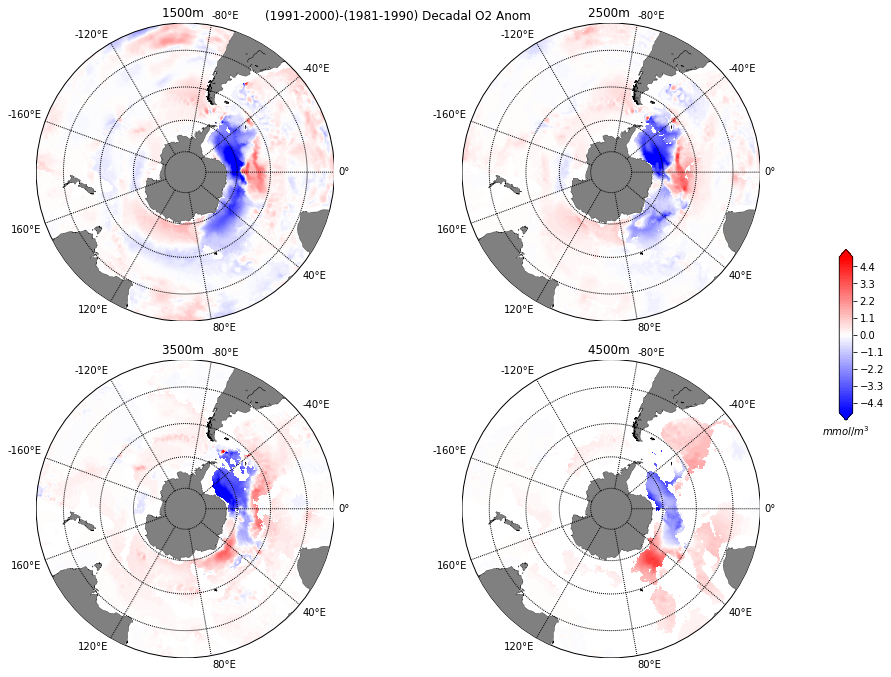

In [14]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal O2 Anom')

clev = np.arange(-5,5.1,.1)
#print clev

st=30
print(st_ocean[st])

var1=np_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[0*12:10*12,st,0:500,:].mean('Time').load()
var2=np_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[10*12:20*12,st,0:500,:].mean('Time').load()

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1500m ')


st=35
print(st_ocean[st])
var1=np_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[0*12:10*12,st,0:500,:].mean('Time').load()
var2=np_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[10*12:20*12,st,0:500,:].mean('Time').load()

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2500m ')

st=40
print(st_ocean[st])
var1=np_pert.o2[8*12:12*18,st,0:500,:].mean('Time').load()-np_cntrl2.o2[0*12:10*12,st,0:500,:].mean('Time').load()
var2=np_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[10*12:20*12,st,0:500,:].mean('Time').load()

plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('3500m ')

st=45
print(st_ocean[st])
var1=np_pert.o2[8*12:18*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[0*12:10*12,st,0:500,:].mean('Time').load()
var2=np_pert.o2[18*12:28*12,st,0:500,:].mean('Time').load()-np_cntrl2.o2[10*12:20*12,st,0:500,:].mean('Time').load()

plt.subplot(2,2,4)
map = Basemap(projection='spstere',boundinglat=-25,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,var2-var1,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('4500m ')

ax3 = plt.axes([0.99,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$mmol/m^3$')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'Decadal_Tanom_Zs.png')
#plt.savefig(of,dpi=220)

#ax3 = plt.axes([0.92,0.38,0.015,0.25])

In [8]:
i=1000 
j=150

print('o2',np_pert.o2[0,33:50,j,i].load())
print('dzt',dzt[33:50,j,i])
print('dzt ma sum ',np.ma.sum(dzt[33:50,j,i],axis=0))
print('dzt sum ',np.sum(dzt[33:50,j,i],axis=0))

print('o2*dzt: ',np_pert.o2[0,33:50,j,i].load()*dzt[33:50,j,i])
print('sum ma o2*dzt: ',np.ma.sum(np_pert.o2[0,33:50,j,i].load()*dzt[33:50,j,i],axis=0))
print('sum o2*dzt: ',np.sum(np_pert.o2[0,33:50,j,i].load()*dzt[33:50,j,i],axis=0))


print('avg o2*dzt/sum(dzt): ',np.sum(np_pert.o2[0,33:50,j,i].load()*dzt[33:50,j,i],axis=0)/np.sum(dzt[33:50,j,i],axis=0))


o2 <xarray.DataArray 'o2' (st_ocean: 17)>
array([235.51898, 235.30621, 235.11562, 234.9531 , 234.821  , 234.71902,
       234.65027, 234.60141, 234.55966, 234.54457, 234.5339 , 234.51326,
       234.5985 , 234.57881,       nan,       nan,       nan], dtype=float32)
Coordinates:
    xt_ocean  float64 -29.88
    yt_ocean  float64 -65.24
  * st_ocean  (st_ocean) float64 2.071e+03 2.271e+03 ... 5.185e+03 5.395e+03
    Time      float64 6.316e+04
Attributes:
    long_name:      o2
    units:          mmol/m^3
    valid_range:    [-1.e+00  5.e+03]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
dzt [198.1728515625 201.29940795898438 203.6198272705078 205.3294677734375
 206.58131408691406 207.49493408203125 208.15867614746094 208.640869140625
 208.9900665283203 209.2423858642578 209.4254150390625 209.5571746826172
 209.65235900878906 201.04953002929688 -- -- --]
dzt ma sum  2887.2144
dzt sum  2887.2144
o2*dzt:  <xarray.

In [10]:
#depOh average between 2000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016
dst=np.zeros(50)
dst[1:50]=np.diff(st_ocean)
dst[0]=st_ocean[0]
#print dst.shape

#depOh integrate from 2000-4000 and 4000:
print(st_ocean[0:27])
print(st_ocean[27:43])
print(st_ocean[43:50])

print(np_pert.o2.shape)
#print pert.o2.shape
pO_0to1=np.zeros((np_pert.o2.shape[0],np_pert.o2.shape[2],np_pert.o2.shape[3]))
pO_2to4=np.zeros((np_pert.o2.shape[0],np_pert.o2.shape[2],np_pert.o2.shape[3]))
pO_4to6=np.zeros((np_pert.o2.shape[0],np_pert.o2.shape[2],np_pert.o2.shape[3]))
#print pO_2to4.shape

for t in range(np_pert.o2.shape[0]):
    print(t)
    
    pO_0to1[t,:,:]=np.sum(np_pert.o2[t,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
    pO_2to4[t,:,:]=np.sum(np_pert.o2[t,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
    pO_4to6[t,:,:]=np.sum(np_pert.o2[t,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    
print(pO_0to1.shape)
of=os.path.join(NYFPertDir,'pO_0to1.npy')
a=np.save(of,pO_0to1)

print(pO_2to4.shape)
of=os.path.join(NYFPertDir,'pO_1to4.npy')
a=np.save(of,pO_2to4)

print(pO_4to6.shape)
of=os.path.join(NYFPertDir,'pO_4to6.npy')
a=np.save(of,pO_4to6)    


[  5.03354979  15.10064983  25.21935081  35.35845184  45.57635117
  55.8532486   66.26174927  76.80284882  87.57695007  98.62325287
 110.09615326 122.10665131 134.90855408 148.74664307 164.05375671
 181.31245422 201.26295471 224.7772522  253.06814575 287.55084229
 330.00775146 382.36505127 446.72634888 524.98242188 618.703125
 728.69207764 854.99353027]
[ 996.715271   1152.37609863 1319.9967041  1497.56188965 1683.05725098
 1874.78820801 2071.25195312 2271.32324219 2474.04296875 2678.75708008
 2884.89794922 3092.1171875  3300.0859375  3508.63305664 3717.56713867
 3926.81274414]
[4136.25146484 4345.86376953 4555.56591797 4765.36865234 4975.20947266
 5185.11083984 5395.02294922]
(528, 50, 1080, 1440)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
10

In [1]:
#depth average between 2000-4000m and below 4000m, Fig 3 of Purkey et al., 2016.
#calculate linear ocean warming trends spanning 1981 to 2016

#depth integrate from 2000-4000 and 4000:
#print st_ocean[33:43]
#print st_ocean[43:50]

#print cntrl.o2.shape
#print cntrl2.o2.shape
cO_0to1=np.zeros((588,np_cntrl.o2.shape[2],np_cntrl.o2.shape[3]))
cO_2to4=np.zeros((588,np_cntrl.o2.shape[2],np_cntrl.o2.shape[3]))
cO_4to6=np.zeros((588,np_cntrl.o2.shape[2],np_cntrl.o2.shape[3]))
#print(cO_2to4.shape)


for t in range(588):
    print(t)
    
    if t<9:
        cO_0to1[t,:,:]=np.sum(np_cntrl.o2[t,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
        cO_2to4[t,:,:]=np.sum(np_cntrl.o2[t,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
        cO_4to6[t,:,:]=np.sum(np_cntrl.o2[t,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    else:
        cO_0to1[t,:,:]=np.sum(np_cntrl2.o2[t-9,0:27,:,:].load()*dzt[0:27,:,:],axis=0)/np.sum(dzt[0:27,:,:],axis=0)
        cO_2to4[t,:,:]=np.sum(np_cntrl2.o2[t-9,27:43,:,:].load()*dzt[27:43,:,:],axis=0)/np.sum(dzt[27:43,:,:],axis=0)
        cO_4to6[t,:,:]=np.sum(np_cntrl2.o2[t-9,43:50,:,:].load()*dzt[43:50,:,:],axis=0)/np.sum(dzt[43:50,:,:],axis=0)
    
#print cO_2to4.shape
of=os.path.join(NYFCntrlDir,'cO_0to1.npy')
a=np.save(of,cO_0to1)

#print cO_2to4.shape
of=os.path.join(NYFCntrlDir,'cO_1to4.npy')
a=np.save(of,cO_2to4)

#print cO_4to6.shape
of=os.path.join(NYFCntrlDir,'cO_4to6.npy')
a=np.save(of,cO_4to6) 


NameError: name 'np' is not defined

In [23]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

In [24]:
of=os.path.join(NYFCntrlDir,'cO_0to1.npy')
np_cO_0to1=np.load(of)

of=os.path.join(NYFCntrlDir,'cO_1to4.npy')
np_cO_1to4=np.load(of)

of=os.path.join(NYFCntrlDir,'cO_4to6.npy')
np_cO_4to6=np.load(of)  

print(np_cO_0to1.shape)
print(np_cO_1to4.shape)
print(np_cO_4to6.shape)

of=os.path.join(NYFPertDir,'pO_0to1.npy')
np_pO_0to1=np.load(of)

of=os.path.join(NYFPertDir,'pO_1to4.npy')
np_pO_1to4=np.load(of)

#of=os.path.join(NYFPertDir,'pO_2to4.npy')
#np_pO_2to4=np.load(of)

of=os.path.join(NYFPertDir,'pO_4to6.npy')
np_pO_4to6=np.load(of)  

print(np_pO_0to1.shape)
print(np_pO_1to4.shape)
print(np_pO_4to6.shape)


(588, 1080, 1440)
(588, 1080, 1440)
(588, 1080, 1440)
(528, 1080, 1440)
(528, 1080, 1440)
(528, 1080, 1440)


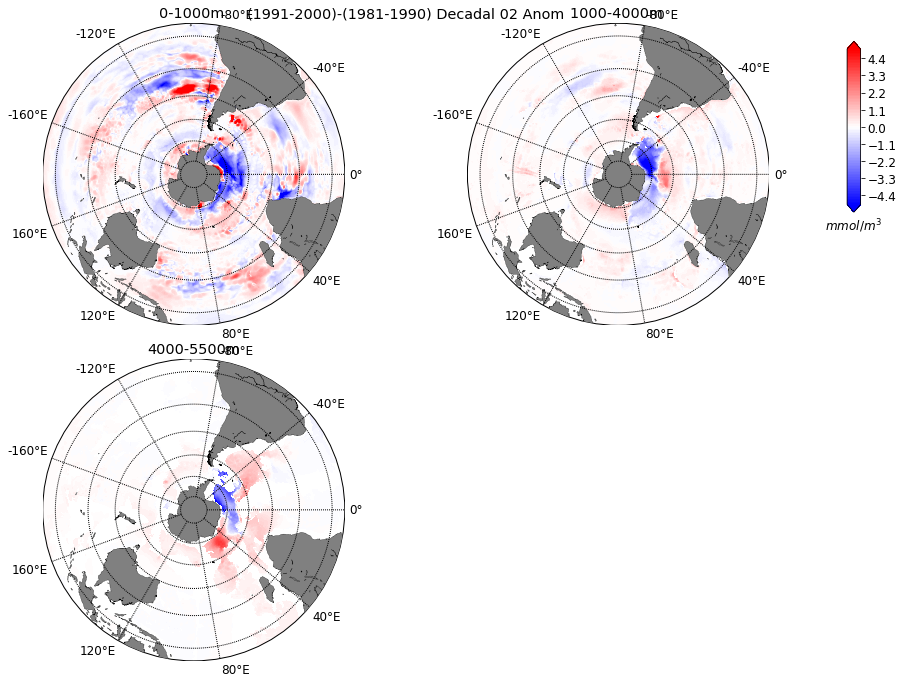

In [25]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
plt.suptitle('(1991-2000)-(1981-1990) Decadal 02 Anom')

clev = np.arange(-5,5.1,.1)
#print clev

cyrs=np.arange(1971,2017,1)
#print cyrs[10:20]
pyrs=np.arange(1973,2017,1)
#print pyrs[8:18]

of=os.path.join(NYFCntrlDir,'cO_0to1.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_0to1.npy')
varP=np.load(of)


var1=np.mean(varC[10*12:20*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var2=np.mean(varC[20*12:30*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var3=np.mean(varP[8*12:18*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var4=np.mean(varP[18*12:28*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()

plt.subplot(2,2,1)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Odim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1), cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('0-1000m ')

of=os.path.join(NYFCntrlDir,'cO_1to4.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_1to4.npy')
varP=np.load(of)

var1=np.mean(varC[10*12:20*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var2=np.mean(varC[20*12:30*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var3=np.mean(varP[8*12:18*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var4=np.mean(varP[18*12:28*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()

plt.subplot(2,2,2)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Odim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1), cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1000-4000m ')


ax3 = plt.axes([0.99,0.68,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_xlabel('$mmol/m^3$')


of=os.path.join(NYFCntrlDir,'cO_4to6.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_4to6.npy')
varP=np.load(of)

var1=np.mean(varC[10*12:20*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var2=np.mean(varC[20*12:30*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var3=np.mean(varP[8*12:18*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()
var4=np.mean(varP[18*12:28*12,0:500,:],axis=0) #-cntrl2.temp[0:10,st,0:500,:].mean('Oime').load()


plt.subplot(2,2,3)
map = Basemap(projection='spstere',boundinglat=0,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Odim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(var4-var2)-(var3-var1),cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('4000-5500m')

plt.tight_layout()

#of = os.path.join(NYFPertDir,'Oanom_decadal_Eq.png')
#plt.savefig(of,dpi=220)

#ax3 = plt.axes([0.92,0.38,0.015,0.25])

In [26]:
#calc dT/dt
cyrs=np.arange(1971,2017,1)
pyrs=np.arange(1973,2017,1)

#calc linear trend in C/s since 1981-2000 (8 years from 1973) 
print(cyrs[10:30])
print(pyrs[8:28])

print(cyrs[30:46])
print(pyrs[28:44])

np_tr81to00_pO=np.zeros((500,1440))
np_tr00to17_pO=np.zeros((500,1440))
np_tr81to17_pO=np.zeros((500,1440))

np_tr81to00_cO=np.zeros((500,1440))
np_tr00to17_cO=np.zeros((500,1440))
np_tr81to17_cO=np.zeros((500,1440))

of=os.path.join(NYFCntrlDir,'cO_0to1.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_0to1.npy')
varP=np.load(of)

for j in range(0,500):
    #print j
    
    np_tr81to00_pO[j,:]=np.polyfit(range(20*12), varP[8*12:28*12,j,:],1)[0,:]
    np_tr00to17_pO[j,:]=np.polyfit(range(16*12), varP[28*12:44*12,j,:],1)[0,:]
    np_tr81to17_pO[j,:]=np.polyfit(range(36*12), varP[8*12:44*12,j,:],1)[0,:]

    np_tr81to00_cO[j,:]=np.polyfit(range(20*12), varC[8*12:28*12,j,:],1)[0,:]
    np_tr00to17_cO[j,:]=np.polyfit(range(16*12), varC[28*12:44*12,j,:],1)[0,:]
    np_tr81to17_cO[j,:]=np.polyfit(range(36*12), varC[8*12:44*12,j,:],1)[0,:]

of=os.path.join(NYFPertDir,'np_tr81to00_pO_0to1.npy')
a=np.save(of,np_tr81to00_pO)
of=os.path.join(NYFPertDir,'np_tr00to17_pO_0to1.npy')
a=np.save(of,np_tr00to17_pO)
of=os.path.join(NYFPertDir,'np_tr81to17_pO_0to1.npy')
a=np.save(of,np_tr81to17_pO)


of=os.path.join(NYFPertDir,'np_tr81to00_cO_0to1.npy')
a=np.save(of,np_tr81to00_cO)
of=os.path.join(NYFPertDir,'np_tr00to17_cO_0to1.npy')
a=np.save(of,np_tr00to17_cO)
of=os.path.join(NYFPertDir,'np_tr81to17_cO_0to1.npy')
a=np.save(of,np_tr81to17_cO)


[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


In [28]:

np_tr73to80_pO=np.zeros((500,1440))
np_tr81to90_pO=np.zeros((500,1440))
np_tr91to00_pO=np.zeros((500,1440))

np_tr81to00_pO=np.zeros((500,1440))
np_tr00to17_pO=np.zeros((500,1440))
np_tr81to17_pO=np.zeros((500,1440))

np_tr73to80_cO=np.zeros((500,1440))
np_tr81to90_cO=np.zeros((500,1440))
np_tr91to00_cO=np.zeros((500,1440))

np_tr81to00_cO=np.zeros((500,1440))
np_tr00to17_cO=np.zeros((500,1440))
np_tr81to17_cO=np.zeros((500,1440))

of=os.path.join(NYFCntrlDir,'cO_1to4.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_1to4.npy')
varP=np.load(of)

for j in range(0,500):
    #print j
    
    np_tr73to80_pO[j,:]=np.polyfit(range(8*12), varP[0*12:8*12,j,:],1)[0,:]
    np_tr81to90_pO[j,:]=np.polyfit(range(10*12), varP[8*12:18*12,j,:],1)[0,:]
    np_tr81to90_pO[j,:]=np.polyfit(range(10*12), varP[18*12:28*12,j,:],1)[0,:]
    np_tr91to00_pO[j,:]=np.polyfit(range(10*12), varP[28*12:38*12,j,:],1)[0,:]

    np_tr73to80_cO[j,:]=np.polyfit(range(8*12), varC[0*12:8*12,j,:],1)[0,:]
    np_tr81to90_cO[j,:]=np.polyfit(range(10*12), varC[8*12:18*12,j,:],1)[0,:]
    np_tr81to90_cO[j,:]=np.polyfit(range(10*12), varC[18*12:28*12,j,:],1)[0,:]
    np_tr91to00_cO[j,:]=np.polyfit(range(10*12), varC[28*12:38*12,j,:],1)[0,:]    
    
    np_tr81to00_pO[j,:]=np.polyfit(range(20*12), varP[8*12:28*12,j,:],1)[0,:]
    np_tr00to17_pO[j,:]=np.polyfit(range(16*12), varP[28*12:44*12,j,:],1)[0,:]
    np_tr81to17_pO[j,:]=np.polyfit(range(36*12), varP[8*12:44*12,j,:],1)[0,:]

    np_tr81to00_cO[j,:]=np.polyfit(range(20*12), varC[8*12:28*12,j,:],1)[0,:]
    np_tr00to17_cO[j,:]=np.polyfit(range(16*12), varC[28*12:44*12,j,:],1)[0,:]
    np_tr81to17_cO[j,:]=np.polyfit(range(36*12), varC[8*12:44*12,j,:],1)[0,:]


of=os.path.join(NYFPertDir,'np_tr73to80_pO_1to4.npy')
a=np.save(of,np_tr73to80_pO)
of=os.path.join(NYFPertDir,'np_tr81to90_pO_1to4.npy')
a=np.save(of,np_tr81to90_pO)
of=os.path.join(NYFPertDir,'np_tr91to00_pO_1to4.npy')
a=np.save(of,np_tr91to00_pO)

of=os.path.join(NYFPertDir,'np_tr73to80_cO_1to4.npy')
a=np.save(of,np_tr73to80_cO)
of=os.path.join(NYFPertDir,'np_tr81to90_cO_1to4.npy')
a=np.save(of,np_tr81to90_cO)
of=os.path.join(NYFPertDir,'np_tr91to00_cO_1to4.npy')
a=np.save(of,np_tr91to00_cO)

of=os.path.join(NYFPertDir,'np_tr81to00_pO_1to4.npy')
a=np.save(of,np_tr81to00_pO)
of=os.path.join(NYFPertDir,'np_tr00to17_pO_1to4.npy')
a=np.save(of,np_tr00to17_pO)
of=os.path.join(NYFPertDir,'np_tr81to17_pO_1to4.npy')
a=np.save(of,np_tr81to17_pO)

of=os.path.join(NYFPertDir,'np_tr81to00_cO_1to4.npy')
a=np.save(of,np_tr81to00_cO)
of=os.path.join(NYFPertDir,'np_tr00to17_cO_1to4.npy')
a=np.save(of,np_tr00to17_cO)
of=os.path.join(NYFPertDir,'np_tr81to17_cO_1to4.npy')
a=np.save(of,np_tr81to17_cO)


In [ ]:
np_tr73to80_pO=np.zeros((500,1440))
np_tr81to90_pO=np.zeros((500,1440))
np_tr91to00_pO=np.zeros((500,1440))

np_tr81to00_pO=np.zeros((500,1440))
np_tr00to17_pO=np.zeros((500,1440))
np_tr81to17_pO=np.zeros((500,1440))

np_tr73to80_cO=np.zeros((500,1440))
np_tr81to90_cO=np.zeros((500,1440))
np_tr91to00_cO=np.zeros((500,1440))

np_tr81to00_cO=np.zeros((500,1440))
np_tr00to17_cO=np.zeros((500,1440))
np_tr81to17_cO=np.zeros((500,1440))

of=os.path.join(NYFCntrlDir,'cO_4to6.npy')
varC=np.load(of)

of=os.path.join(NYFPertDir,'pO_4to6.npy')
varP=np.load(of)

for j in range(0,500):
    #print j
    
    np_tr73to80_pO[j,:]=np.polyfit(range(8*12), varP[0*12:8*12,j,:],1)[0,:]
    np_tr81to90_pO[j,:]=np.polyfit(range(10*12), varP[8*12:18*12,j,:],1)[0,:]
    np_tr81to90_pO[j,:]=np.polyfit(range(10*12), varP[18*12:28*12,j,:],1)[0,:]
    np_tr91to00_pO[j,:]=np.polyfit(range(10*12), varP[28*12:38*12,j,:],1)[0,:]

    np_tr73to80_cO[j,:]=np.polyfit(range(8*12), varC[0*12:8*12,j,:],1)[0,:]
    np_tr81to90_cO[j,:]=np.polyfit(range(10*12), varC[8*12:18*12,j,:],1)[0,:]
    np_tr81to90_cO[j,:]=np.polyfit(range(10*12), varC[18*12:28*12,j,:],1)[0,:]
    np_tr91to00_cO[j,:]=np.polyfit(range(10*12), varC[28*12:38*12,j,:],1)[0,:]    
    
    np_tr81to00_pO[j,:]=np.polyfit(range(20*12), varP[8*12:28*12,j,:],1)[0,:]
    np_tr00to17_pO[j,:]=np.polyfit(range(16*12), varP[28*12:44*12,j,:],1)[0,:]
    np_tr81to17_pO[j,:]=np.polyfit(range(36*12), varP[8*12:44*12,j,:],1)[0,:]

    np_tr81to00_cO[j,:]=np.polyfit(range(20*12), varC[8*12:28*12,j,:],1)[0,:]
    np_tr00to17_cO[j,:]=np.polyfit(range(16*12), varC[28*12:44*12,j,:],1)[0,:]
    np_tr81to17_cO[j,:]=np.polyfit(range(36*12), varC[8*12:44*12,j,:],1)[0,:]

of=os.path.join(NYFPertDir,'np_tr73to80_pO_4to6.npy')
a=np.save(of,np_tr73to80_pO)
of=os.path.join(NYFPertDir,'np_tr81to90_pO_4to6.npy')
a=np.save(of,np_tr81to90_pO)
of=os.path.join(NYFPertDir,'np_tr91to00_pO_4to6.npy')
a=np.save(of,np_tr91to00_pO)

of=os.path.join(NYFPertDir,'np_tr73to80_cO_4to6.npy')
a=np.save(of,np_tr73to80_cO)
of=os.path.join(NYFPertDir,'np_tr81to90_cO_4to6.npy')
a=np.save(of,np_tr81to90_cO)
of=os.path.join(NYFPertDir,'np_tr91to00_cO_4to6.npy')
a=np.save(of,np_tr91to00_cO)

of=os.path.join(NYFPertDir,'np_tr81to00_pO_4to6.npy')
a=np.save(of,np_tr81to00_pO)
of=os.path.join(NYFPertDir,'np_tr00to17_pO_4to6.npy')
a=np.save(of,np_tr00to17_pO)
of=os.path.join(NYFPertDir,'np_tr81to17_pO_4to6.npy')
a=np.save(of,np_tr81to17_pO)

of=os.path.join(NYFPertDir,'np_tr81to00_cO_4to6.npy')
a=np.save(of,np_tr81to00_cO)
of=os.path.join(NYFPertDir,'np_tr00to17_cO_4to6.npy')
a=np.save(of,np_tr00to17_cO)
of=os.path.join(NYFPertDir,'np_tr81to17_cO_4to6.npy')
a=np.save(of,np_tr81to17_cO)


In [3]:
#plot dT/dt K/yr heating trend
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('(1991-2000)-(1981-1990) Decadal Temp Anom')

of=os.path.join(NYFPertDir,'np_tr81to00_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to00_pO_0to1.npy')
p=np.load(of)

clev = np.arange(-.5,.51,.01)
#print clev

plt.subplot(3,3,1)
map = Basemap(projection='spstere',boundinglat=-20,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 0-1000m ')

of=os.path.join(NYFPertDir,'np_tr81to00_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to00_pO_1to4.npy')
p=np.load(of)

plt.subplot(3,3,2)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

of=os.path.join(NYFPertDir,'np_tr81to00_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to00_pO_4to6.npy')
p=np.load(of)

#clev = np.arange(-.01,.011,.001)

plt.subplot(3,3,3)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2000 4000-5500m')

of=os.path.join(NYFPertDir,'np_tr00to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr00to17_pO_0to1.npy')
p=np.load(of)

#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,4)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 0-1000m ')

of=os.path.join(NYFPertDir,'np_tr00to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr00to17_pO_1to4.npy')
p=np.load(of)

plt.subplot(3,3,5)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

of=os.path.join(NYFPertDir,'np_tr00to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr00to17_pO_4to6.npy')
p=np.load(of)

plt.subplot(3,3,6)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('2001-2016 4000-5500m')
          
#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')


of=os.path.join(NYFPertDir,'np_tr81to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_0to1.npy')
p=np.load(of)
#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,7)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 0-1000m ')


of=os.path.join(NYFPertDir,'np_tr81to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_1to4.npy')
p=np.load(of)
#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,3,8)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 1000-4000m ')

#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
#ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

of=os.path.join(NYFPertDir,'np_tr81to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_4to6.npy')
p=np.load(of)

plt.subplot(3,3,9)
map = Basemap(projection='spstere',boundinglat=-1,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10,cmap=plt.cm.bwr, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('1981-2016 4000-5500m')
          
#ax3 = plt.axes([0.99,0.68,0.015,0.25])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_xlabel('$W/m^2$')

plt.tight_layout()


of = '/g/data1/v45/pas561/mom/archive/wp2_figs/Fig_OTrend.png'
plt.savefig(of,dpi=220)

NameError: name 'NYFPertDir' is not defined

<Figure size 900x684 with 0 Axes>

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


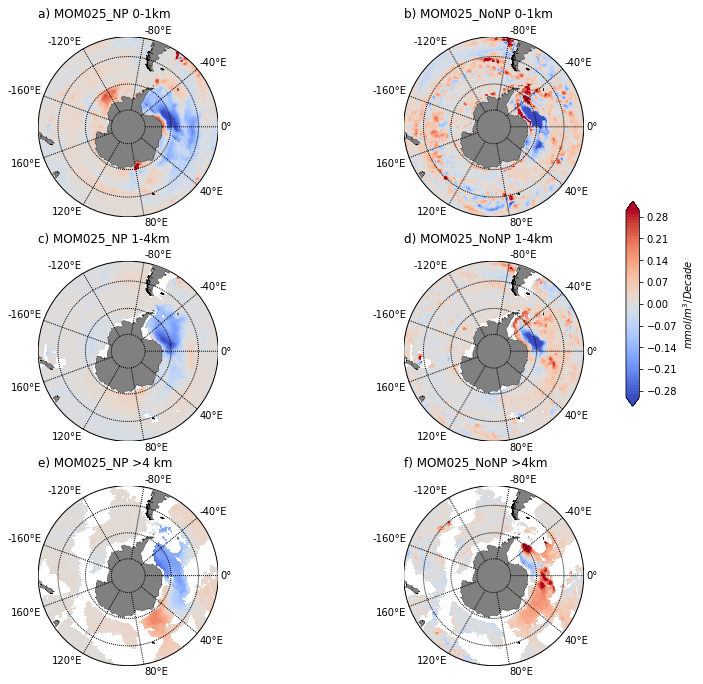

In [11]:

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-.3,.31,.01)


NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr81to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_0to1.npy')
p=np.load(of)

plt.subplot(3,2,1)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('a) MOM025_NP 0-1km',pad=20,loc='left')

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_0to1.npy')
p=np.load(of)

plt.subplot(3,2,2)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('b) MOM025_NoNP 0-1km',pad=20,loc='left')



NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr81to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_1to4.npy')
p=np.load(of)
#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,2,3)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('c) MOM025_NP 1-4km',pad=20,loc='left')

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_1to4.npy')
p=np.load(of)
#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(3,2,4)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('d) MOM025_NoNP 1-4km',pad=20,loc='left')

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr81to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_4to6.npy')
p=np.load(of)

plt.subplot(3,2,5)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10,cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('e) MOM025_NP >4 km',pad=20,loc='left')
          

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_4to6.npy')
p=np.load(of)

plt.subplot(3,2,6)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,(p-c)*10,cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('f) MOM025_NoNP >4km',pad=20,loc='left')
          
#ax3 = plt.axes([0.5,0.05,0.2,0.01])#[0.015,0.20,0.95,0.5,])
#ax3 = plt.axes([0.95,0.05,0.01,0.2])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_ylabel('$mmol/m^3/Decade$')

ax3 = plt.axes([0.85,0.4,0.015,0.3])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_ylabel('$mmol/m^3/Decade$')

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_OTrend.png'
plt.savefig(of,dpi=220)

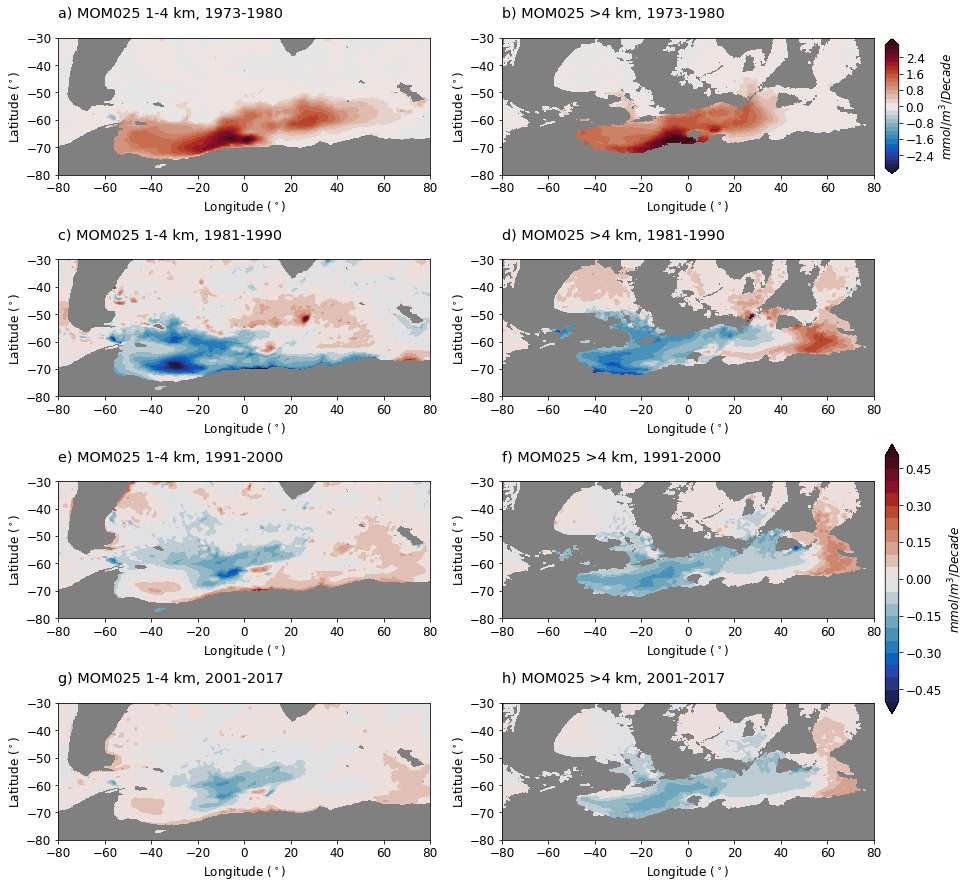

In [46]:
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize(12.5,12.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-3.,3.2,.2)

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr73to80_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr73to80_pO_1to4.npy')
p=np.load(of)

#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(4,2,1)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('a) MOM025 1-4 km, 1973-1980',pad=20,loc='left')

          
of=os.path.join(NYFPertDir,'np_tr73to80_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr73to80_pO_4to6.npy')
p=np.load(of)

plt.subplot(4,2,2)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('b) MOM025 >4 km, 1973-1980',pad=20,loc='left')

ax3 = plt.axes([0.99,0.8,0.015,0.15])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_ylabel('$mmol/m^3/Decade$')


of=os.path.join(NYFPertDir,'np_tr81to90_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to90_pO_1to4.npy')
p=np.load(of)

clev = np.arange(-.5,.55,.05)

plt.subplot(4,2,3)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('c) MOM025 1-4 km, 1981-1990',pad=20,loc='left')

          
of=os.path.join(NYFPertDir,'np_tr81to90_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to90_pO_4to6.npy')
p=np.load(of)

plt.subplot(4,2,4)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('d) MOM025 >4 km, 1981-1990',pad=20,loc='left')

of=os.path.join(NYFPertDir,'np_tr91to00_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr91to00_pO_1to4.npy')
p=np.load(of)

plt.subplot(4,2,5)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('e) MOM025 1-4 km, 1991-2000',pad=20,loc='left')

          
of=os.path.join(NYFPertDir,'np_tr91to00_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr91to00_pO_4to6.npy')
p=np.load(of)

plt.subplot(4,2,6)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('f) MOM025 >4 km, 1991-2000',pad=20,loc='left')
          

of=os.path.join(NYFPertDir,'np_tr00to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr00to17_pO_1to4.npy')
p=np.load(of)

#clev = np.arange(-.01,.011,.001)
#print clev

plt.subplot(4,2,7)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('g) MOM025 1-4 km, 2001-2017',pad=20,loc='left')

          
of=os.path.join(NYFPertDir,'np_tr00to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr00to17_pO_4to6.npy')
p=np.load(of)

plt.subplot(4,2,8)
plt.gca().patch.set_color('.5')
p1=plt.contourf(geolon_t[0:500,:],geolat_t[0:500,:],(p-c)*10, cmap=cmocean.cm.balance, levels=clev, extend='both') #CMRmap_r, gist_stern_r
plt.xlim((-80,80))
plt.ylim((-80,-30))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('h) MOM025 >4 km, 2001-2017',pad=20,loc='left')
    
ax3 = plt.axes([0.99,0.20,0.015,0.3])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
cb.ax.set_ylabel('$mmol/m^3/Decade$')

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_OTrend.png'
plt.savefig(of,dpi=220,bbox_inches='tight')

(500, 1440) (500, 1440) (500, 1440)


Text(0, 0.5, '$mmol/m^3/Decade$')

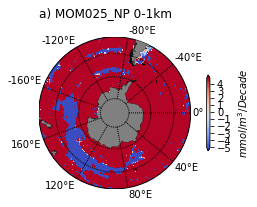

In [24]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr81to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_0to1.npy')
p=np.load(of)

a=(p-c)/p*100

print(p.shape,c.shape,a.shape)

clev = np.arange(-5,5,.25)

plt.subplot(3,2,1)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,a, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('a) MOM025_NP 0-1km',pad=20,loc='left')


cb=plt.colorbar(orientation='vertical',shrink = 0.5)
cb.ax.set_ylabel('$mmol/m^3/Decade$')


/g/data/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in divide
/g/data/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in divide


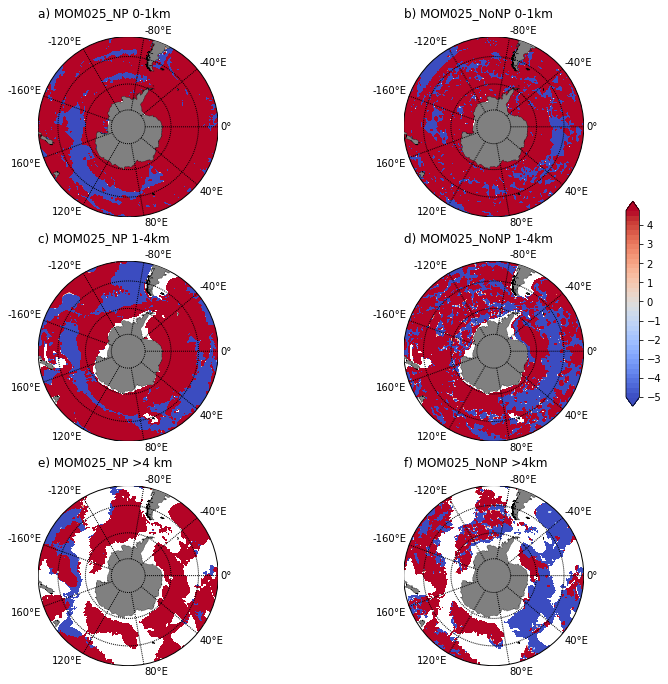

In [14]:

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-5,5,.25)


NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr81to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_0to1.npy')
p=np.load(of)

a=(p-c)/p*100

plt.subplot(3,2,1)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,a*10, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('a) MOM025_NP 0-1km',pad=20,loc='left')

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_0to1.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_0to1.npy')
p=np.load(of)

a=(p-c)/p*100

plt.subplot(3,2,2)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,a*10, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('b) MOM025_NoNP 0-1km',pad=20,loc='left')



NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr81to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_1to4.npy')
p=np.load(of)
#clev = np.arange(-.01,.011,.001)
#print clev
a=(p-c)/p*100

plt.subplot(3,2,3)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,a*10, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('c) MOM025_NP 1-4km',pad=20,loc='left')

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_1to4.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_1to4.npy')
p=np.load(of)
#clev = np.arange(-.01,.011,.001)
#print clev
a=(p-c)/p*100

plt.subplot(3,2,4)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,a*10, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('d) MOM025_NoNP 1-4km',pad=20,loc='left')

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

of=os.path.join(NYFPertDir,'np_tr81to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'np_tr81to17_pO_4to6.npy')
p=np.load(of)
a=(p-c)/p*100

plt.subplot(3,2,5)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,a*10,cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('e) MOM025_NP >4 km',pad=20,loc='left')
          

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

of=os.path.join(NYFPertDir,'nonp_tr81to17_cO_4to6.npy')
c=np.load(of)

of=os.path.join(NYFPertDir,'nonp_tr81to17_pO_4to6.npy')
p=np.load(of)
a=(p-c)/p*100

plt.subplot(3,2,6)
map = Basemap(projection='spstere',boundinglat=-40,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t[0:500,:],geolat_t[0:500,:]) 
#cntrl starts 1971, pert in 1973.
#cntrl Tdim ends in 1980, normal starts 1981
p1=map.contourf(X,Y,a*10,cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.5)
#cb.ax.set_ylabel('$mmol/m^3/Decade$')
#cb.ax.set_xlabel('C')
#clev3 = np.arange(1000,5001,1000)
#map.contour(X,Y,ht[0:500,:],levels=clev3,colors='k',linewidths=1)
plt.title('f) MOM025_NoNP >4km',pad=20,loc='left')
          
#ax3 = plt.axes([0.5,0.05,0.2,0.01])#[0.015,0.20,0.95,0.5,])
#ax3 = plt.axes([0.95,0.05,0.01,0.2])
#cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_ylabel('$mmol/m^3/Decade$')

ax3 = plt.axes([0.85,0.4,0.015,0.3])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
##ticks=[0, 500, 1000, 1500, 2000]
#cb.ax.set_ylabel('$%/Decade$')

plt.tight_layout()

#of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_OTrend_v2.png'
#plt.savefig(of,dpi=220)